<a href="https://colab.research.google.com/github/lmquann/leminhquan/blob/main/ThongKeMoTa02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd 
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt


Để tính giá trị trung bình và giá trị trung vị trong Python, chúng ta có thể sử dụng các hàm pandas của data frame. Giá trị trung bình được tính bằng hàm trim_mean trong scipy.stats:

In [3]:
state = pd.read_csv('/state.csv')
state['Population'].mean()   #Tính giá trị trung bình cột population 
stats.trim_mean(state['Population'], 0.1)
state['Population'].median()   #Tính giá trị trung vị cột Population

4436369.5

Vẽ boxplot

Text(0, 0.5, 'Population (millions)')

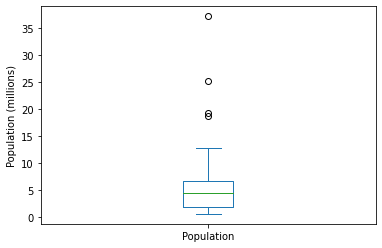

In [9]:
ax = (state['Population']/1_000_000).plot.box()
ax.set_ylabel('Population (millions)')

Bảng phân phối tần số

In [10]:
binnedPopulation = pd.cut(state['Population'], 10)
binnedPopulation.value_counts()

(526935.67, 4232659.0]      24
(4232659.0, 7901692.0]      14
(7901692.0, 11570725.0]      6
(11570725.0, 15239758.0]     2
(15239758.0, 18908791.0]     1
(18908791.0, 22577824.0]     1
(22577824.0, 26246857.0]     1
(33584923.0, 37253956.0]     1
(26246857.0, 29915890.0]     0
(29915890.0, 33584923.0]     0
Name: Population, dtype: int64

Vẽ histogram

Text(0.5, 0, 'Population (millions)')

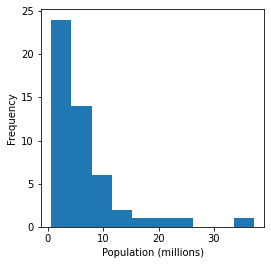

In [11]:
ax = (state['Population'] / 1_000_000).plot.hist(figsize=(4, 4))
ax.set_xlabel('Population (millions)')

Text(0.5, 0, 'Murder Rate (per 100,000)')

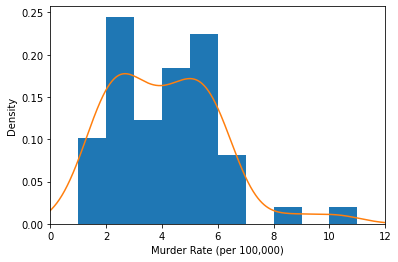

In [12]:
ax = state['Murder.Rate'].plot.hist(density=True, xlim=[0,12], bins=range(1,12))
state['Murder.Rate'].plot.density(ax=ax)
ax.set_xlabel('Murder Rate (per 100,000)')

In [14]:
dfw = pd.read_csv('/dfw_airline.csv')

Vẽ barplot

Text(0, 0.5, 'Count')

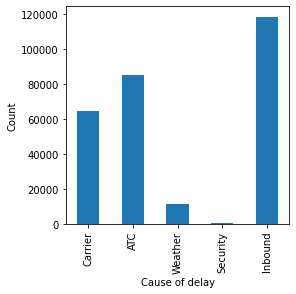

In [15]:
ax = dfw.transpose().plot.bar(figsize=(4, 4), legend=False)
ax.set_xlabel('Cause of delay')
ax.set_ylabel('Count')

In [16]:
lc_loans = pd.read_csv('/lc_loans.csv')

#1 : Đối số từ khóa lề sẽ thêm tổng của cột và hàng.

#2 : Tạo một bản sao của bảng tổng hợp, bỏ qua các tổng của cột.

#3 : chia các hàng với tổng hàng.

#4 : Chia cột 'All' theo tổng của nó 

In [18]:
crosstab = lc_loans.pivot_table(index='grade', columns='status',
aggfunc=lambda x: len(x), margins=True)   #1
df = crosstab.loc['A':'G',:].copy()   #2
df.loc[:,'Charged Off':'Late'] = df.loc[:,'Charged Off':'Late'].div(df['All'],
axis=0)   #3
df['All'] = df['All'] / sum(df['All'])  #4
perc_crosstab = df

perc_crosstab

status,Charged Off,Current,Fully Paid,Late,All
grade,,,,,
A,0.021548,0.690454,0.281528,0.006470,0.160746
B,0.040054,0.709013,0.235401,0.015532,0.293529
C,0.049828,0.735702,0.191495,0.022974,0.268039
D,0.067410,0.717328,0.184189,0.031073,0.164708
E,0.081657,0.707936,0.170929,0.039478,0.077177
F,0.118258,0.654371,0.180409,0.046962,0.028614
G,0.126196,0.614008,0.198396,0.061401,0.007187


In [20]:
airline_stats = pd.read_csv('/airline_stats.csv')

Vẽ boxplot 

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


Text(0.5, 0.98, '')

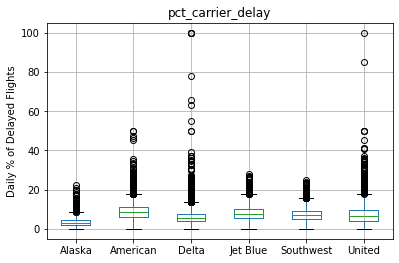

In [21]:
ax = airline_stats.boxplot(by='airline', column='pct_carrier_delay')
ax.set_xlabel('')
ax.set_ylabel('Daily % of Delayed Flights')
plt.suptitle('')

Dùng thư viện seaborn để vẽ violinplot 

In [24]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Daily % of Delayed Flights')

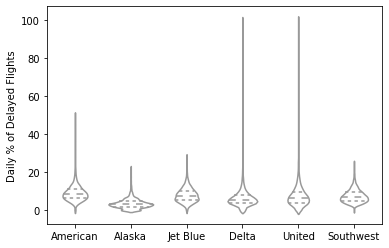

In [25]:
ax = sns.violinplot(airline_stats.airline, airline_stats.pct_carrier_delay,
inner='quartile', color='white')
ax.set_xlabel('')
ax.set_ylabel('Daily % of Delayed Flights')